<a href="https://colab.research.google.com/github/NamLam-L/Transfer-Learning-model/blob/main/DLL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
# keras._version_
keras.__version__

'2.7.0'

# 5.1 - Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.


----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its 
accuracy will still blow out of the water that of the densely-connected model from Chapter 2.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) ## dùng convolution với 32 windows có size (3x3) trên bức ảnh 1 chiều (28x28x1) => output1: (26x26x32) -> độ sâu đã được tăng
model.add(layers.MaxPooling2D((2, 2))) ## Pooling để giảm chiều rộng và chiều dài của output1: (26x26x32) => Output2: (13x13x32)
model.add(layers.Conv2D(64, (3, 3), activation='relu')) ## dùng convolution với 64 windows có size (3x3)  với input là ouput2 => output3: ...
model.add(layers.MaxPooling2D((2, 2))) #Pooling....
model.add(layers.Conv2D(64, (3, 3), activation='relu')) ## convolution

## Lưu ý: khi ấn "run" thì ta chỉ thu về được 1 kiến trúc mạng để học thôi chứ model của ta chưa học bất kỳ gì hết.

Let's display the architecture of our convnet so far:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [ ]:
model.add(layers.Flatten()) ## Dãn đều các  3D vector thành  1D vector
model.add(layers.Dense(64, activation='relu')) ## Vì ta đã giảm chiều dài và chiều rộng của bức ảnh và đồng thời tăng chiều sâu của nó lên tới 64 nên ta sẽ tạo 1 mạng neuron với 64 neurons
model.add(layers.Dense(10, activation='softmax')) ## với mạng neurons ở trên, ta sẽ cho ra 10 output (10 khả năn/xác suất xảy ra)==> trở thành bài toán nhận diện 10 object.

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network looks like:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

Lưu ý: từ bảng summary phía trên 5 bước đầu ta gọi là feature extraction, và 3 bước sau gọi là ta áp dụng mạng NN với feature extractions mà ta thu được

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical



Segment code trên thực hiện 2 điều chính:
<ul>
  <li>Import dataset Mnist từ Keras</li>
  <li>Import `(to_categorical )` để biến label của mỗi bức ảnh trong tệp dataset Mnist thành 1 vector (10,1) cho khớp với output của mạng NN ta vừa xây dựng.</li> 
</ul>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000,28,28,1)) ## reshape the input.
train_images = train_images.astype('float32')/255 ## vì số với số nguyên mạng neuron học rất bất tiện nên ta sẽ chuyển nó thành số thực và scale giá trị của nó trong khoảng từ 0 tói 1.

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

## Chuẩn hóa labels của 2 tệp dataset

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Mọi thứ đã được chuẩn bị rất tốt! Giờ ta sẽ bắt đầu giai đoạn train NN model. \\
Lưu ý: trong model trên, ta có tổng cộng 93,222 trọng số ($w_{i}$ with i from 0 to 93,221). Con số này được lấy ra từ những dòng cuối của lệnh sumary phía trên.


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 0.3770 - accuracy: 0.9346
Epoch 2/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0636 - accuracy: 0.9821
Epoch 3/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0460 - accuracy: 0.9874
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0392 - accuracy: 0.9896
Epoch 5/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0353 - accuracy: 0.9908


Trong đoạn code trên
<ul>
  <li>Compile là setup một số tham số mà ta cần model xuất ra khi đang training, chẳng hạn: accuracy, optimize (cách thức tối ưu hóa), loss (hàm mất mát)</li>
  <li>epoch = 5, batch size = 64 => học 60,000 dữ liệu trong tệp training 5 lần và học theo từng batch có size là 64 images/batch. Trên thực tế (epoch > 10)</li> 
</ul>

Let's evaluate the model on the test data:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 0.0644 - accuracy: 0.9845


(1, 28, 28, 1)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4


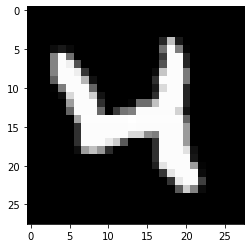

In [ ]:
import matplotlib.pyplot as plt
idx = 20
X = train_images[idx]
plt.gray()
plt.imshow(X.reshape([28,28]))



X = X.reshape((1,28,28,1))
print(X.shape)
img_class = model.predict(X)
print(train_labels[idx])
print(img_class.argmax())